![SkillFactory](http://lms.skillfactory.ru/static/rg-theme/images/logo-header.svg)
# Project-3. EDA + Feature Engineering
## Kim Olga, DST-107


In [367]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [368]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [369]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [370]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [371]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [372]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [373]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [374]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [375]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [376]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [377]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data_hotels = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

## Очистка от пропущенных значений. 
### Адрес, широта, долгота


In [378]:
# хочу сравнить кол-во уник значений в названиях отелей, широте и долготе, т.к. в широте и долготе есть пропуски
print(data_hotels['lat'].nunique())
print(data_hotels['lng'].nunique())
print(data_hotels['hotel_name'].nunique())

1472
1472
1492


In [379]:
# посмотреть, как строится строка адреса
data_hotels.loc[:5, 'hotel_address']
display(data_hotels['hotel_address'].loc[0])
display(data_hotels['hotel_address'].loc[3])
display(data_hotels['hotel_address'].loc[4])
display(data_hotels['hotel_address'].loc[5])

'Via Senigallia 6 20161 Milan Italy'

'Piazza Della Repubblica 17 Central Station 20124 Milan Italy'

'Singel 303 309 Amsterdam City Center 1012 WJ Amsterdam Netherlands'

'Coram Street Camden London WC1N 1HT United Kingdom'

In [380]:
# извлекаю из адреса страну и город
def get_country(address):
    # делим строку
    address_list = address.split(' ')
    # проверяем последний элемент
    if address_list[-1] == 'Kingdom':
        country = 'United Kingdom'
    else:
        country = address_list[-1]
    return country

data_hotels['hotel_country'] = data_hotels['hotel_address'].apply(get_country)

def get_city(address):
    # делим строку
    address_list = address.split(' ')
    # проверяем последний элемент
    if address_list[-1] == 'Kingdom':
        city = address_list[-5]
    else:
        city = address_list[-2]
    return city

data_hotels['hotel_city'] = data_hotels['hotel_address'].apply(get_city)

# попробую составить словари с городами
dict_lat_city = data_hotels.groupby('hotel_city')['lat'].max().to_dict()
print(len(dict_lat_city))
dict_lat_city

6


{'Amsterdam': 52.4001813,
 'Barcelona': 41.4337561,
 'London': 51.6068054,
 'Milan': 45.5331372,
 'Paris': 48.9015941,
 'Vienna': 48.2565936}

In [381]:
# заполняю пропуски значениями из словаря 
data_hotels['lat'] = data_hotels[['hotel_city','lat']].apply(lambda x: dict_lat_city[x.hotel_city] if np.isnan(x.lat) else x.lat, axis=1)
# проверяю, остались ли пропуски
data_hotels['lat'].isna().sum()

0

In [382]:
# то же самое для долготы
dict_lng_city = data_hotels.groupby('hotel_city')['lng'].first().to_dict()

data_hotels['lng'] = data_hotels[['hotel_city','lng']].apply(lambda x: dict_lng_city[x.hotel_city] if np.isnan(x.lng) else x.lng, axis=1)
data_hotels['lng'].isna().sum()

0

## Создание новых признаков. 
новые столбцы с данными из существующих данных или с использованием внешних источников.


### review_date 

In [383]:
data_hotels['review_date'].head()

0     7/21/2017
1    12/12/2016
2    11/26/2015
3    10/17/2015
4     5/16/2016
Name: review_date, dtype: object

In [384]:
data_hotels['review_date'] = pd.to_datetime(data_hotels['review_date'])
# попробую выделить из даты месяц
data_hotels['review_month'] = data_hotels['review_date'].dt.month

# год
data_hotels['review_year'] = data_hotels['review_date'].dt.year

# и разбить по сезонам 
def get_season_number(data):
    number = 0
    if data in [1, 2, 12]:
        number = 1
    elif data in [3, 4, 5]:
        number = 2
    elif data in [6, 7, 8]:
        number = 3
    elif data in [9, 10, 11]:
        number = 4
    return number
         
data_hotels['review_season'] = data_hotels['review_month'].apply(get_season_number)

### hotel_name 


In [385]:
# кодируем признак "Название отеля" 
import category_encoders as ce 
bin_encoder = ce.BinaryEncoder(cols=['hotel_name']) 
type_bin = bin_encoder.fit_transform(data_hotels['hotel_name'])
data_hotels = pd.concat([data_hotels, type_bin], axis=1)

data_hotels.columns

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'tags',
       'days_since_review', 'lat', 'lng', 'sample', 'reviewer_score',
       'hotel_country', 'hotel_city', 'review_month', 'review_year',
       'review_season', 'hotel_name_0', 'hotel_name_1', 'hotel_name_2',
       'hotel_name_3', 'hotel_name_4', 'hotel_name_5', 'hotel_name_6',
       'hotel_name_7', 'hotel_name_8', 'hotel_name_9', 'hotel_name_10'],
      dtype='object')

### reviewer_nationality 

In [386]:
# кодирую страну рецензента 

bin_encoder_nation = ce.BinaryEncoder(cols=['reviewer_nationality']) 
digit_nation = bin_encoder_nation.fit_transform(data_hotels['reviewer_nationality'])
data_hotels = pd.concat([data_hotels, digit_nation], axis=1)

data_hotels.columns

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'tags',
       'days_since_review', 'lat', 'lng', 'sample', 'reviewer_score',
       'hotel_country', 'hotel_city', 'review_month', 'review_year',
       'review_season', 'hotel_name_0', 'hotel_name_1', 'hotel_name_2',
       'hotel_name_3', 'hotel_name_4', 'hotel_name_5', 'hotel_name_6',
       'hotel_name_7', 'hotel_name_8', 'hotel_name_9', 'hotel_name_10',
       'reviewer_nationality_0', 'reviewer_nationality_1',
       'reviewer_nationality_2', 'reviewer_nationality_3',
       'reviewer_nationality_4', 'reviewer_nationality_5',
       'reviewer_nationality_6', 'reviewer_nationality_7'],
      dtype='object')

### Признаки, связанные с отзывами: 'negative_review', 'review_total_negative_word_counts', 'positive_review',       'review_total_positive_word_counts'


In [387]:
display(data_hotels.loc[0, 'negative_review'])
display(data_hotels.loc[2, 'negative_review'])
display(data_hotels.loc[500, 'negative_review'])
display(data_hotels.loc[386802, 'negative_review'])

' Would have appreciated a shop in the hotel that sold drinking water etc but not necessity Would recommend if like us you arrive late at night to bring drinks from plane airport as there s no shop nearby There is a minibar though if you want to pay those prices '

' Pillows '

' Breakfast was bio and fresh but no eggs cheese was not great 1 choice only and cakes were dried Breakfast wa ok but not great '

' internet connection very low not possible in every place '

In [388]:
# удаляю пробелы в начале и конце строки
data_hotels['negative_review'] = data_hotels['negative_review'].apply(lambda x: x.strip())
data_hotels['positive_review'] = data_hotels['positive_review'].apply(lambda x: x.strip())
display(data_hotels.loc[0, 'negative_review'])
display(data_hotels.loc[386801, 'negative_review'])

'Would have appreciated a shop in the hotel that sold drinking water etc but not necessity Would recommend if like us you arrive late at night to bring drinks from plane airport as there s no shop nearby There is a minibar though if you want to pay those prices'

'No Negative'

In [389]:
data_hotels['review_total_negative_word_counts'].head()

0    52
1    10
2     3
3     0
4     0
Name: review_total_negative_word_counts, dtype: int64

In [390]:
# цифры в столбце 'review_total_negative_word_counts' не совпадают с реальным количеством слов в отзыве,
# поэтому меняю признак
def get_real_length(review):
    review = review.split(' ')
    length = len(review)
    return length

data_hotels['review_total_negative_word_counts'] = data_hotels['negative_review'].apply(get_real_length)
# сделаю то же с positive_review
data_hotels['review_total_positive_word_counts'] = data_hotels['positive_review'].apply(get_real_length)

data_hotels['review_total_negative_word_counts'] # так больше похоже на правду

0         50
1          9
2          1
3          2
4          2
          ..
515733     2
515734     2
515735    10
515736     2
515737    18
Name: review_total_negative_word_counts, Length: 515738, dtype: int64

In [391]:
# пробую провести сентимент-оценку отзывов
#!python -m pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [392]:
nltk.downloader.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()

data_hotels['n_scores'] = data_hotels['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x))

data_hotels['p_scores'] = data_hotels['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x))

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [393]:
# разделю по отдельным признакам
def get_sent_elem(data, scores, name):
    """функция разбивает рез-ты сентимент-анализа
    на отдельные признаки

    Args:
        data (_type_): датафрейм
        scores (_type_): столбец для обработки 
        name (_type_): имя для новых столбцов

    Returns:
        новый датафрейм
    """
    data[name+'_' +'neg'] = data[scores].apply(lambda x: x['neg'])
    data[name+'_' +'neu'] = data[scores].apply(lambda x: x['neu'])
    data[name+'_' +'pos'] = data[scores].apply(lambda x: x['pos'])
    data[name+'_' +'compound'] = data[scores].apply(lambda x: x['compound'])
      
    return data

get_sent_elem(data_hotels, 'n_scores', 'n')
get_sent_elem(data_hotels, 'p_scores', 'p')
data_hotels.columns

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'tags',
       'days_since_review', 'lat', 'lng', 'sample', 'reviewer_score',
       'hotel_country', 'hotel_city', 'review_month', 'review_year',
       'review_season', 'hotel_name_0', 'hotel_name_1', 'hotel_name_2',
       'hotel_name_3', 'hotel_name_4', 'hotel_name_5', 'hotel_name_6',
       'hotel_name_7', 'hotel_name_8', 'hotel_name_9', 'hotel_name_10',
       'reviewer_nationality_0', 'reviewer_nationality_1',
       'reviewer_nationality_2', 'reviewer_nationality_3',
       'reviewer_nationality_4', 'reviewer_nationality_5',
       'reviewer_nationality_6', 'reviewer_nationality_7', 'n_scores',
       'p_scores', 'n_neg', 'n_neu', 'n_pos'

### Tags

возвращаемся к тегам

In [394]:
import re
def re_func(num_tags):
    """функция принимает строку, находит в ней все совпадения с шаблоном
    и записывает их в переменную
    в нашем случае шаблон означает, что мы берем любые (все) слова, 
    только кавычки убираем
    
    Args:
        num_tags (_type_): строка

    Returns:
        _type_: шаблон
    """
    found = re.findall("'[^\'](.+?)[^\']'", num_tags)
    return found

data_hotels['tags_new'] = data_hotels['tags'].apply(re_func)
n_tags = data_hotels.explode('tags_new') # временный датасет, для анализа тегов

len(n_tags['tags_new'].unique())

2428

In [395]:
data_hotels['tags_new'].head()

0    [Leisure trip, Couple, Double Room, Stayed 2 n...
1    [Leisure trip, Group, Triple Room, Stayed 1 ni...
2    [Business trip, Solo traveler, Twin Room, Stay...
3    [Leisure trip, Couple, Ambassador Junior Suite...
4    [Business trip, Solo traveler, Classic Double ...
Name: tags_new, dtype: object

In [396]:
# попробуем выделить самые популярные теги
n_tags['tags_new'].value_counts().nlargest(20)

Leisure trip                      417778
Submitted from a mobile device    307640
Couple                            252294
Stayed 1 night                    193645
Stayed 2 nights                   133937
Solo traveler                     108545
Stayed 3 nights                    95821
Business trip                      82939
Group                              65392
Family with young children         61015
Stayed 4 nights                    47817
Double Room                        35207
Standard Double Room               32248
Superior Double Room               31393
Family with older children         26349
Deluxe Double Room                 24823
Double or Twin Room                22393
Stayed 5 nights                    20845
Standard Double or Twin Room       17483
Classic Double Room                16989
Name: tags_new, dtype: int64

In [397]:
# составлю топ-15 тегов (15, потому что дальше теги составляют меньше 0,5% от числа строк)
list_of_tags = list(n_tags['tags_new'].value_counts().nlargest(15).index)
list_of_tags

['Leisure trip',
 'Submitted from a mobile device',
 'Couple',
 'Stayed 1 night',
 'Stayed 2 nights',
 'Solo traveler',
 'Stayed 3 nights',
 'Business trip',
 'Group',
 'Family with young children',
 'Stayed 4 nights',
 'Double Room',
 'Standard Double Room',
 'Superior Double Room',
 'Family with older children']

In [398]:
def get_pop_tag_count(tags_new):
    """функция подсчитывает, сколько популярных тегов использовал рецензент

    Args:
        tags_new (str): список тегов
        
    Returns:
        число ()
    """
    list_of_tags = [
        'Leisure trip', 'Submitted from a mobile device',
        'Couple', 'Stayed 1 night', 'Stayed 2 nights',
        'Solo traveler', 'Stayed 3 nights', 'Business trip',
        'Group', 'Family with young children', 'Stayed 4 nights',
        'Double Room', 'Standard Double Room', 'Superior Double Room',
        'Family with older children'
    ]
    counter = 0
    for elem in tags_new:
        if elem in list_of_tags:
            counter += 1
    return counter
data_hotels['popular_tags_count'] = data_hotels['tags_new'].apply(get_pop_tag_count)
data_hotels['popular_tags_count'].head()

0    4
1    3
2    4
3    3
4    4
Name: popular_tags_count, dtype: int64

In [399]:
# попробую подсчитать, сколько всего тегов использовал рецензент
data_hotels['total_tags_count'] = data_hotels['tags_new'].apply(lambda x: len(x))
data_hotels['total_tags_count']

0         4
1         4
2         5
3         4
4         5
         ..
515733    5
515734    5
515735    4
515736    4
515737    4
Name: total_tags_count, Length: 515738, dtype: int64

### days_since_review

In [400]:
data_hotels['days_since_review'].head() # выделить число!

0    13 days
1    234 day
2    616 day
3    656 day
4    444 day
Name: days_since_review, dtype: object

In [401]:
def get_days_number(days_str):
    days_str =  days_str.split(' ')
    return days_str[-2]

data_hotels['days_since_review'] = data_hotels['days_since_review'].apply(get_days_number).astype('int')
data_hotels['days_since_review']

0          13
1         234
2         616
3         656
4         444
         ... 
515733    106
515734    171
515735    543
515736     74
515737    363
Name: days_since_review, Length: 515738, dtype: int64

## Удаление строковых значений. 
Необходимо удалить из набора данных столбцы, данные в которых представлены не числами.

In [402]:
drop_list = list(data_hotels.select_dtypes(exclude=[np.number]).columns)
data_hotels = data_hotels.drop(drop_list, axis=1)
data_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 43 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int64  
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   sample                                      515738 non-null  int64  
 

## Преобразование признаков. 

In [403]:
data_hotels.columns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'days_since_review',
       'lat', 'lng', 'sample', 'reviewer_score', 'review_month', 'review_year',
       'review_season', 'hotel_name_0', 'hotel_name_1', 'hotel_name_2',
       'hotel_name_3', 'hotel_name_4', 'hotel_name_5', 'hotel_name_6',
       'hotel_name_7', 'hotel_name_8', 'hotel_name_9', 'hotel_name_10',
       'reviewer_nationality_0', 'reviewer_nationality_1',
       'reviewer_nationality_2', 'reviewer_nationality_3',
       'reviewer_nationality_4', 'reviewer_nationality_5',
       'reviewer_nationality_6', 'reviewer_nationality_7', 'n_neg', 'n_neu',
       'n_pos', 'n_compound', 'p_neg', 'p_neu', 'p_pos', 'p_compound',
       'popular_tags_count', 'total_tags_count'],
      dtype='object')

In [404]:
# разделю признаки 
# на числовые 
num_cols = [
    'additional_number_of_scoring', 'average_score', 
    'review_total_negative_word_counts', 'total_number_of_reviews',
    'review_total_positive_word_counts', 
    'total_number_of_reviews_reviewer_has_given', 
    'days_since_review','lat', 'lng', 'n_neg', 'n_neu',
    'n_pos', 'n_compound', 'p_neg', 'p_neu', 'p_pos', 
    'p_compound','popular_tags_count', 'total_tags_count'
]

# категориальные
cat_cols = ['review_month', 'review_year', 'review_season']

# и бинарные, признаки, которые я не хочу преобразовывать, sample и reviewer_score тоже добавлю сюда
bin_cols = [
    'hotel_name_0', 'hotel_name_1', 'hotel_name_2',
    'hotel_name_3', 'hotel_name_4', 'hotel_name_5', 
    'hotel_name_6', 'hotel_name_7', 'hotel_name_8', 
    'hotel_name_9', 'hotel_name_10','reviewer_nationality_0',
    'reviewer_nationality_1','reviewer_nationality_2', 
    'reviewer_nationality_3','reviewer_nationality_4',
    'reviewer_nationality_5','reviewer_nationality_6', 
    'reviewer_nationality_7', 'sample', 'reviewer_score'
]

a = len(num_cols)+len(cat_cols)+len(bin_cols)
a

43

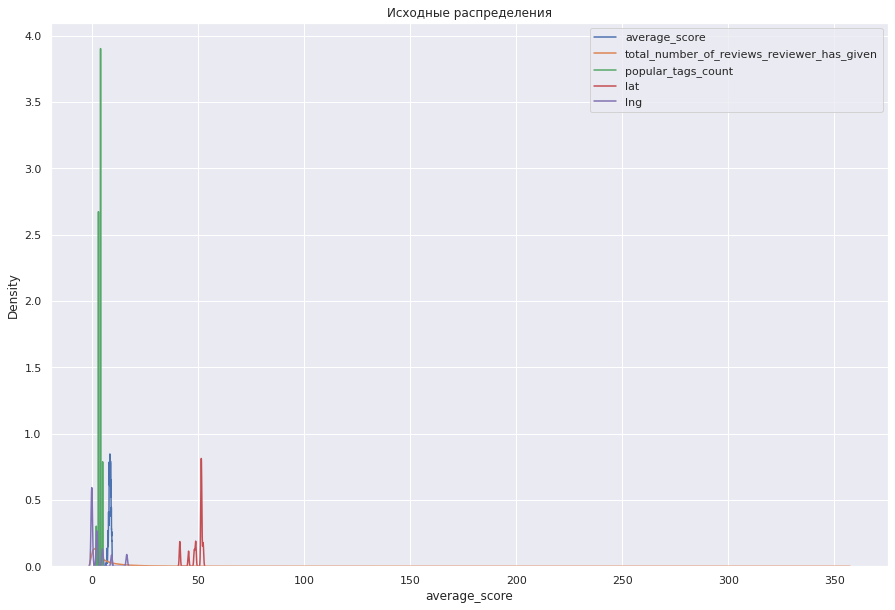

In [405]:
# попробуем взглянуть на распределение некоторых числовых признаков
fig, (ax1) = plt.subplots(ncols=1, figsize=(15,10))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(data_hotels['average_score'], ax=ax1, label ='average_score')
sns.kdeplot(data_hotels['total_number_of_reviews_reviewer_has_given'], ax=ax1, label ='total_number_of_reviews_reviewer_has_given')
sns.kdeplot(data_hotels['popular_tags_count'], ax=ax1, label ='popular_tags_count')
sns.kdeplot(data_hotels['lat'], ax=ax1, label ='lat')
sns.kdeplot(data_hotels['lng'], ax=ax1, label ='lng')


plt.legend()

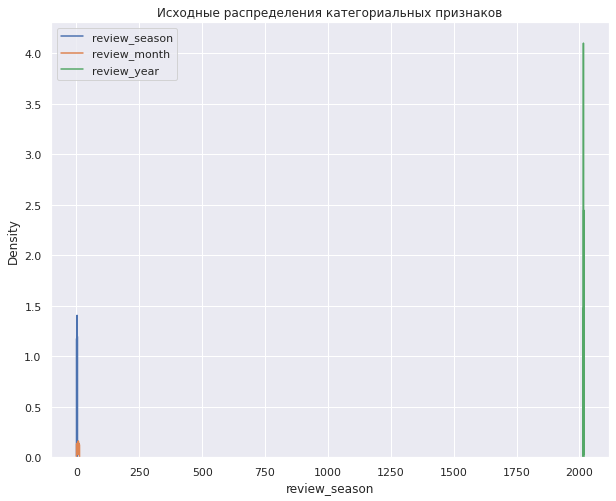

In [406]:
# хочу посмотреть распределение категориальных признаков
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Исходные распределения категориальных признаков')

# kdeplot() 
sns.kdeplot(data_hotels['review_season'], ax=ax1, label ='review_season')
sns.kdeplot(data_hotels['review_month'], ax=ax1, label ='review_month')
sns.kdeplot(data_hotels['review_year'], ax=ax1, label ='review_year')

plt.legend()

In [407]:
data_hotels[num_cols].columns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'days_since_review',
       'lat', 'lng', 'n_neg', 'n_neu', 'n_pos', 'n_compound', 'p_neg', 'p_neu',
       'p_pos', 'p_compound', 'popular_tags_count', 'total_tags_count'],
      dtype='object')

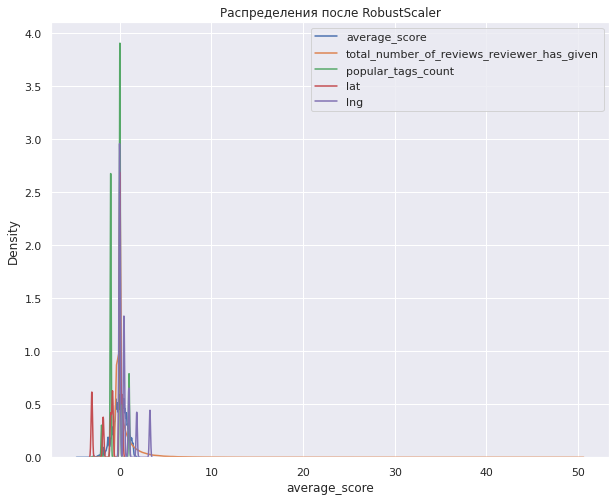

In [408]:
# числовые признаки попробую нормализовать через RobustScaler, так как данные не очищены и возможны выбросы
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()


# копируем исходный датасет
data_hotels_r = r_scaler.fit_transform(data_hotels[num_cols]) # числовые признаки после нормализации


# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_hotels_r = pd.DataFrame(data_hotels_r, columns=num_cols)

# взглдянем на распределение после нормализации
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(data_hotels_r['average_score'], ax=ax1, label ='average_score')
sns.kdeplot(data_hotels_r['total_number_of_reviews_reviewer_has_given'], ax=ax1, label ='total_number_of_reviews_reviewer_has_given')
sns.kdeplot(data_hotels_r['popular_tags_count'], ax=ax1, label ='popular_tags_count')
sns.kdeplot(data_hotels_r['lat'], ax=ax1, label ='lat')
sns.kdeplot(data_hotels_r['lng'], ax=ax1, label ='lng')

plt.legend()

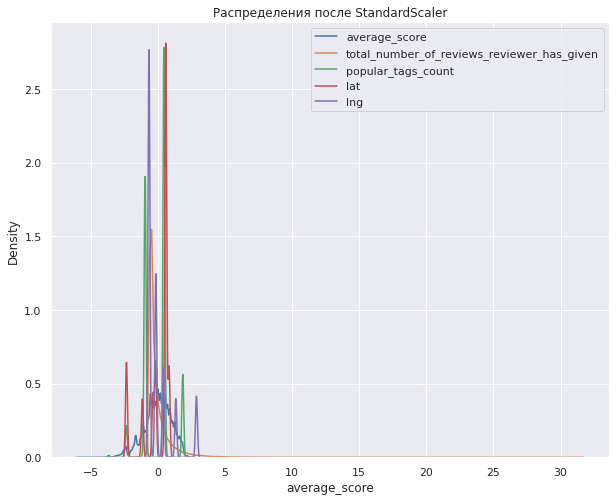

In [409]:
# стандартизируем данные 
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

data_hotels_r_s = s_scaler.fit_transform(data_hotels_r)

data_hotels_r_s = pd.DataFrame(data_hotels_r_s, columns=num_cols) 
# числовые признаки после нормализации и стандартизации

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(data_hotels_r_s['average_score'], ax=ax1, label ='average_score')
sns.kdeplot(data_hotels_r_s['total_number_of_reviews_reviewer_has_given'], ax=ax1, label ='total_number_of_reviews_reviewer_has_given')
sns.kdeplot(data_hotels_r_s['popular_tags_count'], ax=ax1, label ='popular_tags_count')
sns.kdeplot(data_hotels_r_s['lat'], ax=ax1, label ='lat')
sns.kdeplot(data_hotels_r_s['lng'], ax=ax1, label ='lng')


plt.legend()

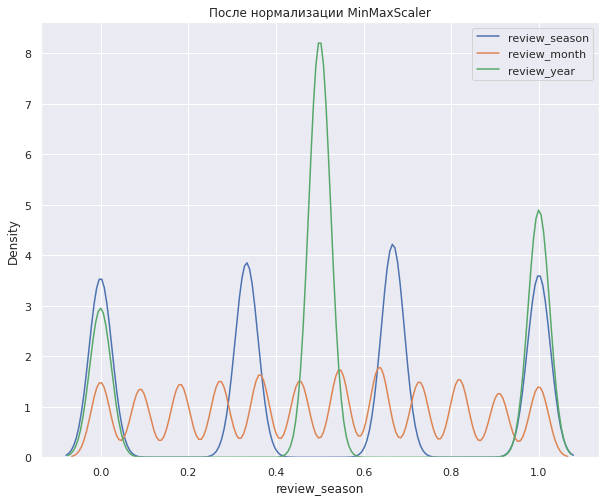

In [410]:
# а категориальные через  MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

df_cat_mm = mm_scaler.fit_transform(data_hotels[cat_cols])

df_cat_mm = pd.DataFrame(df_cat_mm, columns=cat_cols) # категориальные признаки после нормализации

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_cat_mm['review_season'], ax=ax1, label ='review_season')
sns.kdeplot(df_cat_mm['review_month'], ax=ax1, label ='review_month')
sns.kdeplot(df_cat_mm['review_year'], ax=ax1, label ='review_year')

plt.legend()

In [411]:
# создаю таблицу с преобразованными признаками
data_hotels_transf = pd.concat([data_hotels_r_s, df_cat_mm], axis=1)
data_hotels_transf = pd.concat([data_hotels_transf, data_hotels[bin_cols]], axis=1)
data_hotels_transf.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,n_neg,...,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,sample,reviewer_score
0,0.810964,-0.542812,1.106748,6.009269,2.028408,-0.558504,-1.634257,-1.126992,1.345201,-0.468020,...,0,0,0,0,0,0,0,1,0,0.0
1,0.227591,0.369517,-0.304652,0.981356,-0.674051,-0.015036,-0.576476,0.853435,0.415952,-0.256174,...,0,0,0,0,0,0,1,0,0,0.0
2,-0.903192,-0.177880,-0.580048,-1.032484,-0.580862,0.709587,1.251906,-2.323467,-0.156795,-0.782135,...,0,0,0,0,0,0,1,1,0,0.0
3,-0.513611,1.281847,-0.545623,-0.518129,0.444208,0.166120,1.443359,-1.142382,1.350600,1.652870,...,0,0,0,0,0,1,0,0,0,0.0
4,0.671114,1.281847,-0.545623,0.838527,-0.534268,-0.467926,0.428655,0.849069,0.427566,1.652870,...,0,0,0,0,0,0,0,1,0,0.0


## Отбор признаков.
Используем анализ мультиколлинеарности как шаг отбора признаков для модели.

<AxesSubplot:>

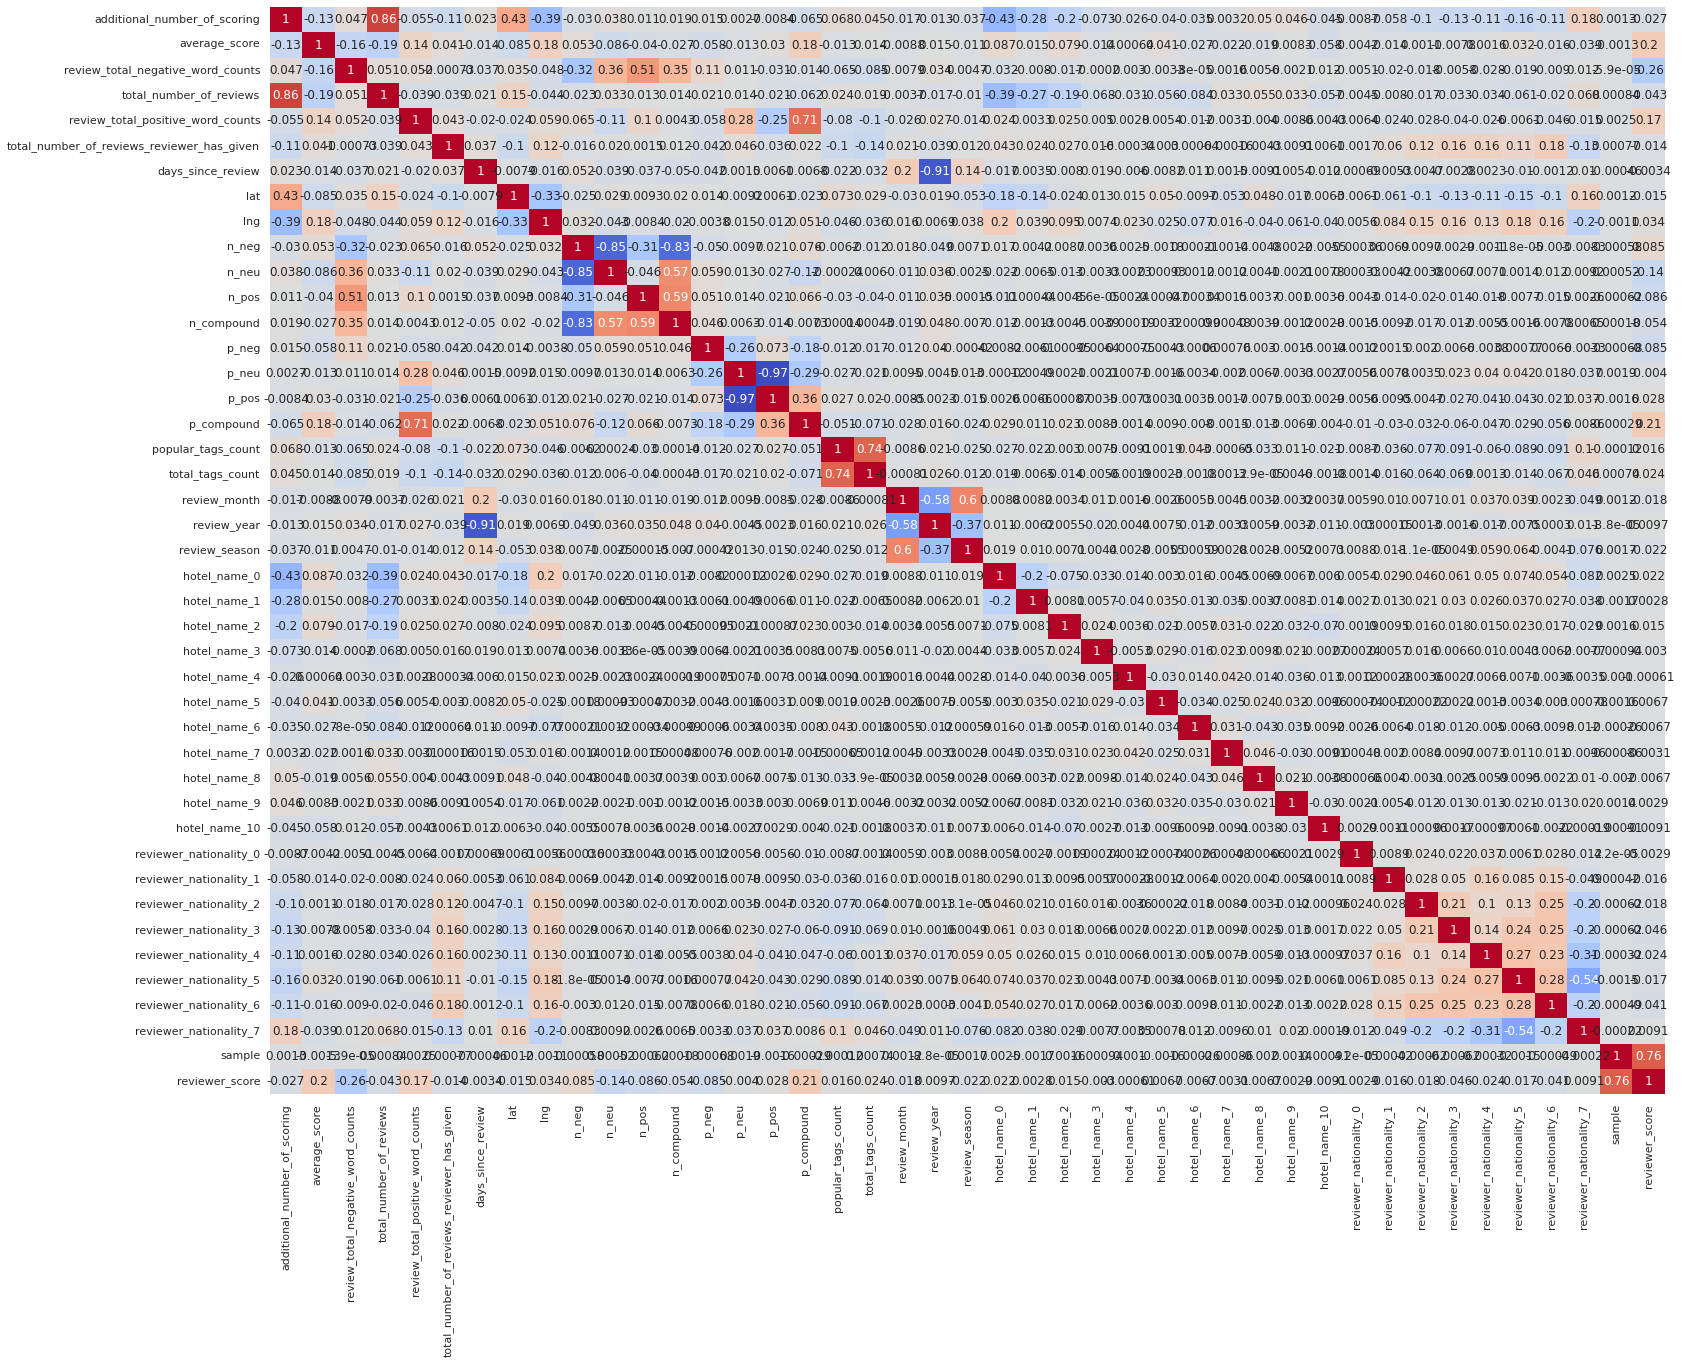

In [412]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(data_hotels_transf.corr(method = 'spearman'), annot=True, cmap= 'coolwarm', cbar=False)

<AxesSubplot:>

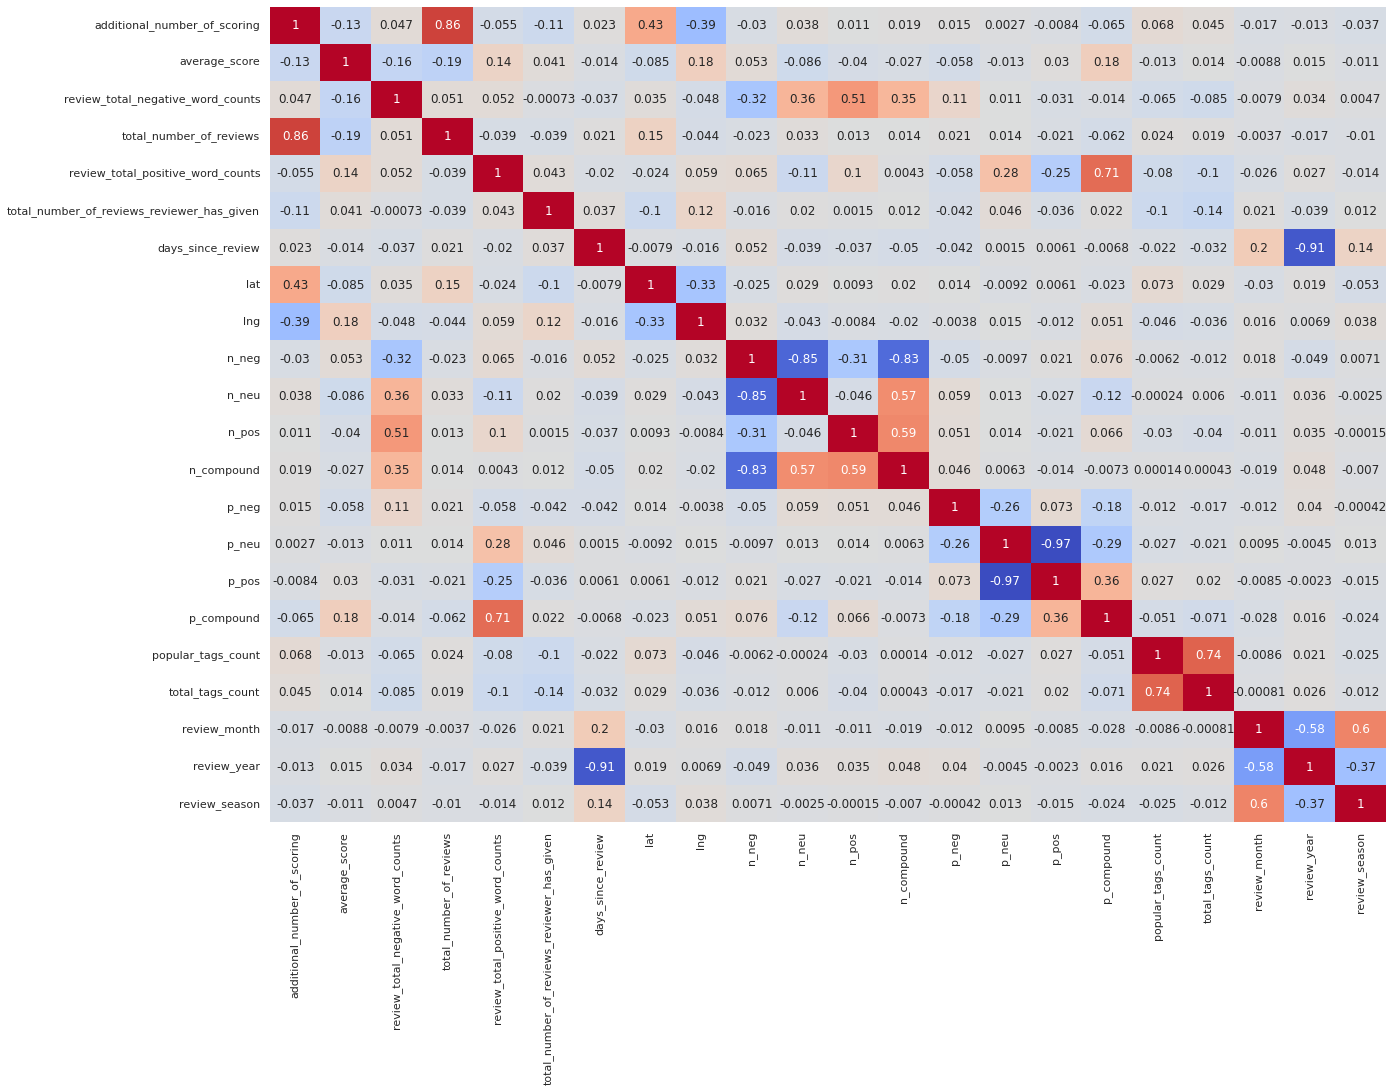

In [413]:
# составлю тепловую карту покрупнее, отбрасывая признаки, где не замечено сильной корреляции
cols_wtht_code_feat = num_cols + cat_cols
df_wtht_code_feat = data_hotels_transf.loc[:, cols_wtht_code_feat]

sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df_wtht_code_feat.corr(method = 'spearman'), annot=True, cmap= 'coolwarm', cbar=False)

Коррелируют следующие признаки:
- 'additional_number_of_scoring', 'total_number_of_reviews': 0,86 - удалить 'total_number_of_reviews'
- 'days_since_review', 'review_year': -0,91 - 'days_since_review'
- 'n_neg', 'n_neu': -0,86  - 'n_neg'
- 'n_neg', 'n_compound': -0,83
- 'p_neu', 'p_pos': -0,97 - 'p_neu'

In [414]:
# удаляю ['total_number_of_reviews', 'days_since_review', 'n_neg', 'p_neu']
data_hotels_transf = data_hotels_transf.drop(['total_number_of_reviews', 'days_since_review', 'n_neg', 'p_neu'], axis=1)

## Разделение набора данных

In [415]:
# Теперь выделим тестовую часть
train_data = data_hotels_transf.query('sample == 1').drop(['sample'], axis=1)
test_data = data_hotels_transf.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [416]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [417]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 38), (386803, 38), (386803, 37), (309442, 37), (77361, 37))

## Создание и обучение модели

In [418]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [419]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [420]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


In [421]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) 
# и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
def mape( actual , pred ):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
print('MAPE: ', mape(y_test, y_pred))

MAPE:  12.552871042764044


## Оценка значимости признаков

<AxesSubplot:>

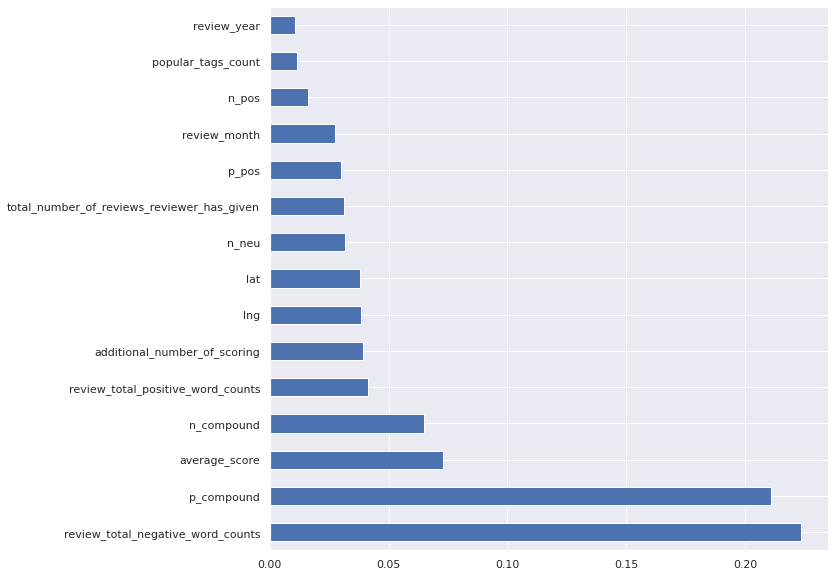

In [422]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Пробовала удалять разные признаки, которые были показаны, как несущественные, но метрика становилась хуже. Поэтому оставила их.

## Submission

In [423]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,n_neu,n_pos,n_compound,...,hotel_name_10,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,reviewer_score
116041,-0.116039,-0.725278,-0.545623,-0.674051,-0.558504,0.600942,-0.658162,0.970766,-0.462036,0.444594,...,0,0,0,1,0,0,0,1,1,0.0
23919,0.065766,0.551983,-0.476774,0.024861,-0.467926,0.600814,-0.635279,-0.434010,4.185064,1.697373,...,1,0,0,0,0,0,0,0,1,0.0
113922,1.488235,-0.542812,-0.580048,-0.254704,-0.467926,0.601393,-0.658531,0.970766,-0.462036,0.444594,...,0,0,0,0,0,0,0,0,1,0.0
106957,-0.046114,0.916915,-0.580048,1.049931,-0.467926,0.599041,-0.646563,0.970766,-0.462036,0.444594,...,1,0,0,0,0,0,1,0,0,0.0
93163,-0.873224,-0.725278,-0.373501,-0.627457,-0.558504,-2.325549,-0.158963,0.141134,2.282447,1.409315,...,1,0,0,0,0,0,0,0,1,0.0
46938,-0.361774,-1.455142,-0.545623,-0.347892,-0.015036,0.602133,-0.657449,-1.574118,-0.462036,-1.109823,...,1,0,0,1,0,1,1,0,0,0.0
3606,-0.751355,0.187051,-0.580048,-0.347892,-0.558504,-1.140413,1.342290,0.970766,-0.462036,0.444594,...,0,0,0,0,0,1,1,0,0,0.0
18240,0.065766,1.099381,-0.545623,-0.487674,-0.377348,0.601000,-0.648210,-1.574118,-0.462036,-1.109823,...,0,0,1,0,0,1,0,1,0,0.0
83193,-0.641473,-0.907744,-0.235804,-0.534268,0.347276,-2.326310,-0.152963,0.477059,-0.462036,-0.302823,...,1,0,1,0,0,0,0,1,0,0.0
80760,0.952811,0.551983,0.521533,0.071455,-0.558504,0.844480,0.432821,0.530501,0.464017,1.236480,...,0,0,0,0,0,0,1,0,0,0.0


In [424]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [425]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [426]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.1s finished


In [427]:
predict_submission

array([8.549, 7.549, 9.072, ..., 8.592, 9.605, 6.921])

In [428]:
list(sample_submission)

['reviewer_score', 'id']

In [429]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission_final.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.549,488440
1,7.549,274649
2,9.072,374688
3,9.803,404352
4,9.598,451596
5,9.043,302161
6,7.882,317079
7,7.466,13963
8,8.398,159785
9,7.216,195089
